In [7]:
pwd

'C:\\Users\\Kriszta\\Desktop\\GitHub-Spiced\\logistic-lemongrass-student-code\\week_8\\data'

In [163]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx 

plt.rcParams['figure.figsize'] = (10,6)

In [106]:
df_monday = pd.read_csv('monday.csv' ,sep= ';')
df_monday.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [107]:
df_monday['date']= pd.to_datetime(df_monday['timestamp'])
df_monday['hour']= pd.to_datetime(df_monday['timestamp'].astype(str)).dt.hour
df_monday['minute']= pd.to_datetime(df_monday['timestamp'].astype(str)).dt.minute
df_monday.set_index('date', inplace= True)

In [108]:
df_monday.head()

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4


In [109]:
# number of customers on Monday

len(df_monday['customer_no'].unique())

1447

In [110]:
# Calculate the total number of customers in each section, on Monday

In [111]:
df_monday.groupby(['location']).nunique() # nunique() function return Series with number of distinct observations over requested axis

,timestamp,customer_no,location,hour,minute
location,,,,,
checkout,700,1437,1,15,60
dairy,527,720,1,15,60
drinks,514,661,1,15,60
fruit,577,827,1,15,60
spices,479,584,1,15,60


Text(0.5, 0, 'location')

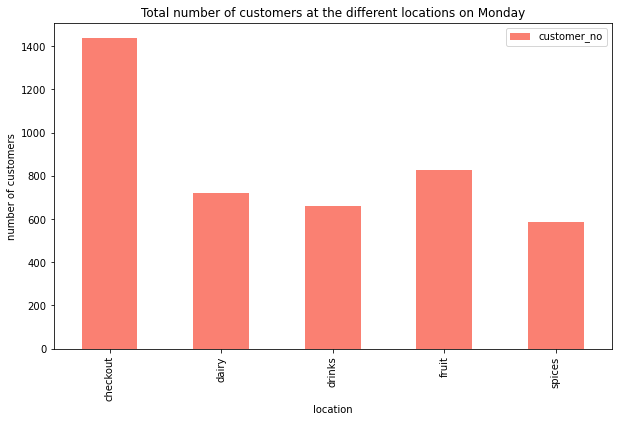

In [112]:
location_count = pd.DataFrame(df_monday.groupby(['location']).nunique())
location_count.drop(['timestamp','location','hour','minute'], axis=1).plot.bar(color= 'salmon')

plt.title('Total number of customers at the different locations on Monday')
plt.ylabel('number of customers')
plt.xlabel('location')

In [113]:
# Calculate the total number of customers in each section over time

In [114]:
df_monday.groupby(['location', 'timestamp'])['customer_no'].count()

location  timestamp          
checkout  2019-09-02 07:05:00    2
          2019-09-02 07:06:00    2
          2019-09-02 07:07:00    1
          2019-09-02 07:08:00    3
          2019-09-02 07:09:00    1
                                ..
spices    2019-09-02 21:43:00    1
          2019-09-02 21:44:00    1
          2019-09-02 21:46:00    2
          2019-09-02 21:48:00    1
          2019-09-02 21:49:00    2
Name: customer_no, Length: 2797, dtype: int64

In [115]:
# Calculate the total number of customers in each section over hour

pd.DataFrame(df_monday.groupby(['location', 'hour'])['customer_no'].count())

customer_no
location hour             
checkout 7              92
         8             112
         9              85
         10             90
         11             55
...                    ...
spices   17             50
         18             70
         19             59
         20             52
         21             18

[75 rows x 1 columns]

Text(0.5, 0, 'hour')

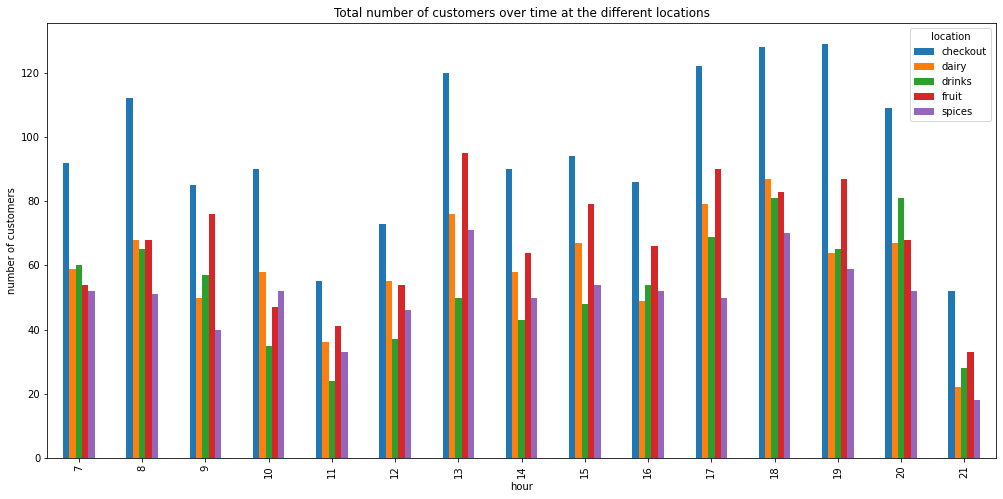

In [116]:
plt.rcParams['figure.figsize'] = (17,8)

df_monday.groupby(['hour', 'location'])['customer_no'].count().unstack().plot.bar()
plt.title('Total number of customers over time at the different locations')
plt.ylabel('number of customers')
plt.xlabel('hour')

In [117]:
# Display the number of customers at checkout over time

In [118]:
df_monday[df_monday['location'] == 'checkout'].groupby('timestamp')['customer_no'].count()

timestamp
2019-09-02 07:05:00    2
2019-09-02 07:06:00    2
2019-09-02 07:07:00    1
2019-09-02 07:08:00    3
2019-09-02 07:09:00    1
                      ..
2019-09-02 21:44:00    1
2019-09-02 21:46:00    1
2019-09-02 21:47:00    2
2019-09-02 21:48:00    2
2019-09-02 21:49:00    2
Name: customer_no, Length: 700, dtype: int64

In [119]:
#let´s see by hour

In [120]:
df_monday[df_monday['location'] == 'checkout'].groupby('hour')['customer_no'].count()

hour
7      92
8     112
9      85
10     90
11     55
12     73
13    120
14     90
15     94
16     86
17    122
18    128
19    129
20    109
21     52
Name: customer_no, dtype: int64

Text(0.5, 0, 'hour')

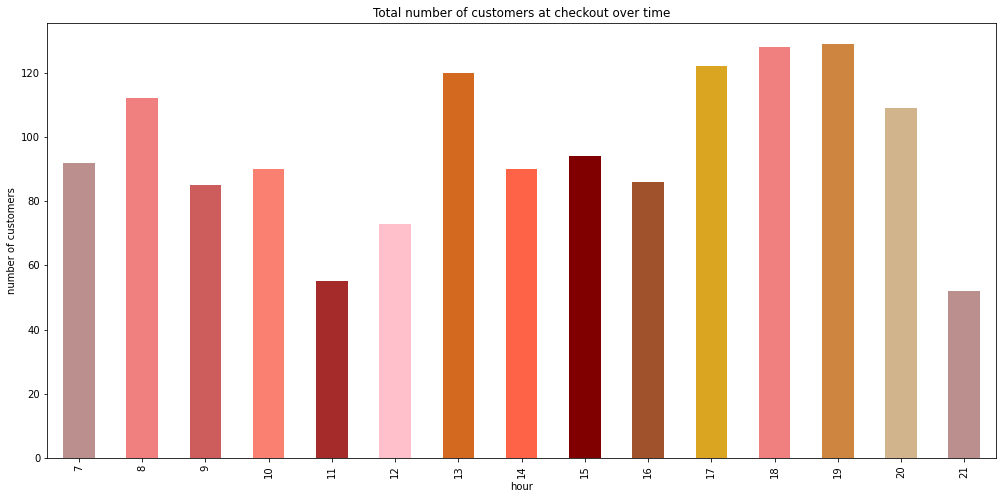

In [121]:
colors = ['rosybrown', 'lightcoral','indianred', 'salmon','brown','pink','chocolate','tomato','maroon','sienna','goldenrod','lightcoral','peru','tan']

df_monday[df_monday['location'] == 'checkout'].groupby('hour')['customer_no'].count().plot.bar(color=colors )
plt.title('Total number of customers at checkout over time')
plt.ylabel('number of customers')
plt.xlabel('hour')

In [122]:
# Calculate the time each customer spent in the market

In [123]:
df_monday.head()

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4


In [124]:
arrival_time=df_monday.groupby(['customer_no'], as_index = False) ['timestamp'].min()
arrival_time.rename(columns={'timestamp':'arrival_time'}, inplace=True)
arrival_time.head()

,customer_no,arrival_time
0,1,2019-09-02 07:03:00
1,2,2019-09-02 07:03:00
2,3,2019-09-02 07:04:00
3,4,2019-09-02 07:04:00
4,5,2019-09-02 07:04:00


In [125]:
check_out_time=df_monday.groupby(['customer_no'],as_index = False) ['timestamp'].max()
check_out_time.rename(columns={'timestamp':'check_out_time'}, inplace=True)
check_out_time.head()

,customer_no,check_out_time
0,1,2019-09-02 07:05:00
1,2,2019-09-02 07:06:00
2,3,2019-09-02 07:06:00
3,4,2019-09-02 07:08:00
4,5,2019-09-02 07:05:00


In [126]:
time = pd.concat([check_out_time, arrival_time] ,axis = 1, sort= False)

In [127]:
time.head()

,customer_no,check_out_time,customer_no,arrival_time
0,1,2019-09-02 07:05:00,1,2019-09-02 07:03:00
1,2,2019-09-02 07:06:00,2,2019-09-02 07:03:00
2,3,2019-09-02 07:06:00,3,2019-09-02 07:04:00
3,4,2019-09-02 07:08:00,4,2019-09-02 07:04:00
4,5,2019-09-02 07:05:00,5,2019-09-02 07:04:00


In [128]:
time['arrival_time'] = pd.to_datetime(time['arrival_time'], format = '%Y-%m-%d %H:%M:%S.%f')

In [129]:
time['check_out_time']=pd.to_datetime(time['check_out_time'] , format = '%Y-%m-%d %H:%M:%S.%f')

In [130]:
time['stay']= time['check_out_time']-time['arrival_time']
time.head(8)

,customer_no,check_out_time,customer_no,arrival_time,stay
0,1,2019-09-02 07:05:00,1,2019-09-02 07:03:00,00:02:00
1,2,2019-09-02 07:06:00,2,2019-09-02 07:03:00,00:03:00
2,3,2019-09-02 07:06:00,3,2019-09-02 07:04:00,00:02:00
3,4,2019-09-02 07:08:00,4,2019-09-02 07:04:00,00:04:00
4,5,2019-09-02 07:05:00,5,2019-09-02 07:04:00,00:01:00
5,6,2019-09-02 07:29:00,6,2019-09-02 07:04:00,00:25:00
6,7,2019-09-02 07:13:00,7,2019-09-02 07:04:00,00:09:00
7,8,2019-09-02 07:07:00,8,2019-09-02 07:04:00,00:03:00


In [131]:
time['stay_min']= time['stay'].dt.total_seconds()/60
time['stay_min'] = time['stay_min'].astype(int)
time.head()

,customer_no,check_out_time,customer_no,arrival_time,stay,stay_min
0,1,2019-09-02 07:05:00,1,2019-09-02 07:03:00,00:02:00,2
1,2,2019-09-02 07:06:00,2,2019-09-02 07:03:00,00:03:00,3
2,3,2019-09-02 07:06:00,3,2019-09-02 07:04:00,00:02:00,2
3,4,2019-09-02 07:08:00,4,2019-09-02 07:04:00,00:04:00,4
4,5,2019-09-02 07:05:00,5,2019-09-02 07:04:00,00:01:00,1


Text(0.5, 0, 'how long stayed (in minutes)')

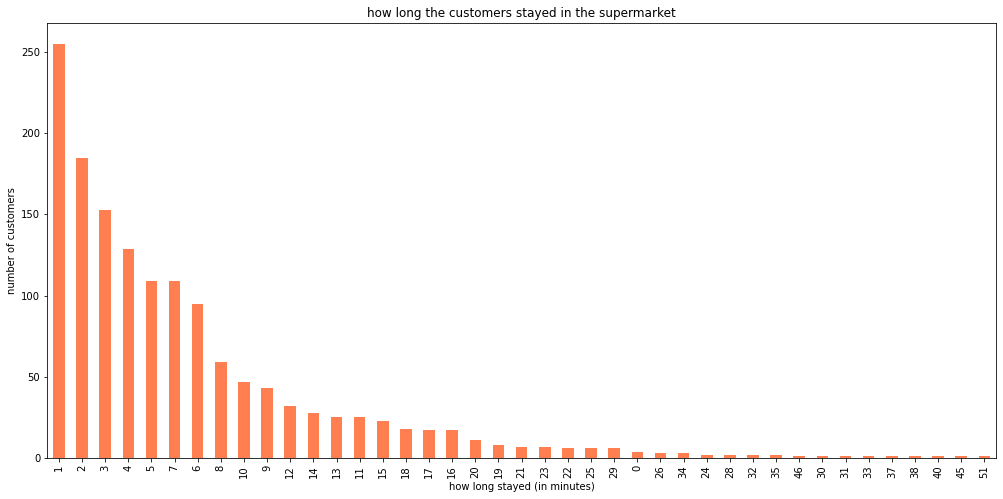

In [132]:
time['stay_min'].value_counts().plot.bar(color= 'coral')
plt.title('how long the customers stayed in the supermarket')
plt.ylabel('number of customers')
plt.xlabel('how long stayed (in minutes)')

In [133]:
# Calculate the total number of customers present in the supermarket over time.

In [134]:
location_count['customer_no'].sum() # the total number of customers on Monday

4229

In [136]:
# all inf about customer 7
cust_7 = df_monday[df_monday['customer_no'] == 7].resample('T').asfreq().ffill()

cust_7

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:04:00,2019-09-02 07:04:00,7.0,spices,7.0,4.0
2019-09-02 07:05:00,2019-09-02 07:05:00,7.0,drinks,7.0,5.0
2019-09-02 07:06:00,2019-09-02 07:05:00,7.0,drinks,7.0,5.0
2019-09-02 07:07:00,2019-09-02 07:05:00,7.0,drinks,7.0,5.0
2019-09-02 07:08:00,2019-09-02 07:05:00,7.0,drinks,7.0,5.0
2019-09-02 07:09:00,2019-09-02 07:09:00,7.0,spices,7.0,9.0
2019-09-02 07:10:00,2019-09-02 07:09:00,7.0,spices,7.0,9.0
2019-09-02 07:11:00,2019-09-02 07:11:00,7.0,fruit,7.0,11.0
2019-09-02 07:12:00,2019-09-02 07:11:00,7.0,fruit,7.0,11.0


In [137]:
location = pd.DataFrame(cust_7['location'].value_counts())
location.reset_index(inplace=True)
location.rename(columns={'index':'section'},inplace= True)
location

,section,location
0,drinks,4
1,spices,3
2,fruit,2
3,checkout,1


In [201]:
section = ['fruit','spices','dairy','drinks']
revenue_per_minute_euro = [4,3,5,6]

rev = pd.DataFrame({'section':section, 'revenue_per_minute_euro':revenue_per_minute_euro})
rev

,section,revenue_per_minute_euro
0,fruit,4
1,spices,3
2,dairy,5
3,drinks,6


In [202]:
df = pd.merge(left=rev , right=location , left_on='section', right_on = 'section', how='left')
df['location'].fillna('0', inplace=True)
df['revenue_per_minute_euro'] = df['revenue_per_minute_euro'].astype(int)
df['location'] = df['location'].astype(int)
df['spent_euro'] = df['revenue_per_minute_euro']*df['location']
df

,section,revenue_per_minute_euro,location,spent_euro
0,fruit,4,2,8
1,spices,3,3,9
2,dairy,5,0,0
3,drinks,6,4,24


Text(0.5, 0, 'section')

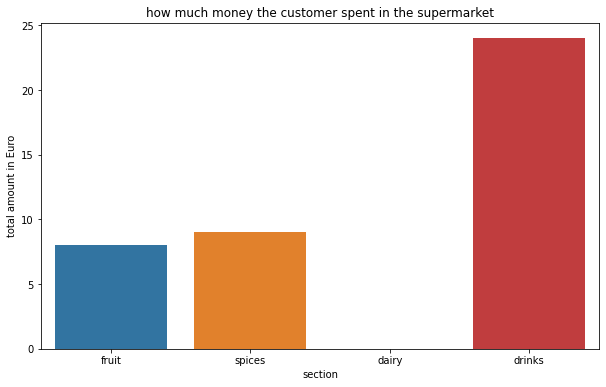

In [205]:
sns.barplot(x='section', y='spent_euro', data=df)
plt.title('how much money the customer spent in the supermarket')
plt.ylabel('total amount in Euro')
plt.xlabel('section')

In [206]:
df['spent_euro'].sum() # the total amount cusomer 7 spent in the shop 

41

In [ ]:
# movments of customer 7 with networkx

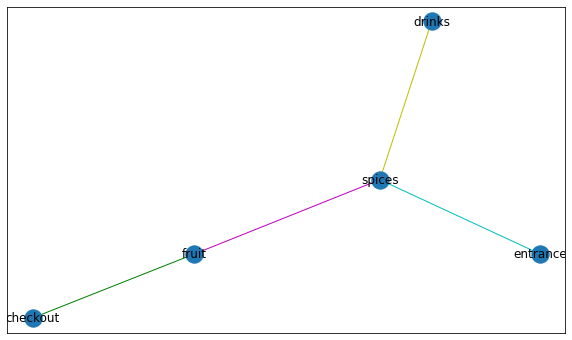

In [195]:
g = nx.Graph()
g.add_edge('entrance', 'spices', color='c')
g.add_edge('spices', 'drinks', color='r') 
g.add_edge('drinks', 'spices', color='y') 
g.add_edge('spices', 'fruit',color='m') 
g.add_edge('fruit', 'checkout',color='g')



edges = g.edges()
colors = [g[u][v]['color'] for u,v in edges]

nx.draw_networkx(g,  edges=edges, edge_color=colors, with_label = True)

In [51]:
# let´s get the transition probability matrix for Monday

In [52]:
df_monday.head()

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4


In [53]:
df_monday.drop(['timestamp','hour','minute'], axis= 1, inplace =True)
df_monday.head()

,customer_no,location
date,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices


In [54]:
df_monday = df_monday.groupby(['customer_no']).resample('T').ffill()
df_monday.drop(['customer_no'], axis=1, inplace= True)
df_monday.head()

location
customer_no date                         
1           2019-09-02 07:03:00     dairy
            2019-09-02 07:04:00     dairy
            2019-09-02 07:05:00  checkout
2           2019-09-02 07:03:00     dairy
            2019-09-02 07:04:00     dairy

In [55]:
df_monday=df_monday.reset_index().set_index('date')
df_monday.head()

,customer_no,location
date,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:04:00,1,dairy
2019-09-02 07:05:00,1,checkout
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,2,dairy


In [56]:
df_monday['prev_location']= df_monday['location'].shift(1)
df_monday.head()

,customer_no,location,prev_location
date,,,
2019-09-02 07:03:00,1,dairy,NaN
2019-09-02 07:04:00,1,dairy,dairy
2019-09-02 07:05:00,1,checkout,dairy
2019-09-02 07:03:00,2,dairy,checkout
2019-09-02 07:04:00,2,dairy,dairy


In [57]:
# replace checkout with entrance

df_monday=df_monday[df_monday['prev_location'] != 'checkout']
df_monday.fillna('entrance' , inplace= True)
df_monday.head()

,customer_no,location,prev_location
date,,,
2019-09-02 07:03:00,1,dairy,entrance
2019-09-02 07:04:00,1,dairy,dairy
2019-09-02 07:05:00,1,checkout,dairy
2019-09-02 07:04:00,2,dairy,dairy
2019-09-02 07:05:00,2,dairy,dairy


In [58]:
df_monday.groupby(['prev_location', 'location']).count()['customer_no'].unstack()

location,checkout,dairy,drinks,fruit,spices
prev_location,,,,,
dairy,310.0,2601.0,218.0,181.0,185.0
drinks,426.0,23.0,1250.0,186.0,162.0
entrance,NaN,1.0,NaN,NaN,NaN
fruit,524.0,225.0,132.0,1554.0,122.0
spices,177.0,236.0,217.0,120.0,478.0


In [59]:
pd.crosstab(df_monday['prev_location'], df_monday['location'], normalize= 0)

location,checkout,dairy,drinks,fruit,spices
prev_location,,,,,
dairy,0.088698,0.744206,0.062375,0.051788,0.052933
drinks,0.208109,0.011236,0.610650,0.090865,0.079140
entrance,0.000000,1.000000,0.000000,0.000000,0.000000
fruit,0.204928,0.087994,0.051623,0.607743,0.047712
spices,0.144137,0.192182,0.176710,0.097720,0.389251


In [60]:
#change the order of the columns as the supermarket model

sup_mark = pd.crosstab(df_monday['prev_location'], df_monday['location'], normalize= 0)
sup_mark = sup_mark[['fruit','spices','dairy','drinks','checkout']]
sup_mark.reindex(index =['entrance','fruit','spices','dairy','drinks'])


location,fruit,spices,dairy,drinks,checkout
prev_location,,,,,
entrance,0.000000,0.000000,1.000000,0.000000,0.000000
fruit,0.607743,0.047712,0.087994,0.051623,0.204928
spices,0.097720,0.389251,0.192182,0.176710,0.144137
dairy,0.051788,0.052933,0.744206,0.062375,0.088698
drinks,0.090865,0.079140,0.011236,0.610650,0.208109
